# Point functions

In [1]:
#based on S. Halim's code
import math
import numpy as np
EPS = 1e-6

#the representation on a point
class Point:
    def __init__(self, _x=0, _y=0):
        self.x = _x
        self.y = _y
    
    #operator overloaded (==)
    def __eq__(self, other_point):
        if abs(self.x - other_point.x) < EPS and abs(self.y - other_point.y) < EPS:
            return True
        return False
    
    def get_position(self):
        return (self.x,self.y)

#the Euclidean distance
def dist(x, y):
    return ((x.x-y.x)**2 + (x.y-y.y)**2)**0.5

In [2]:
p1 = Point(3,4)
p2 = Point(3,2)
p1.x == p2.x

True

# Vector functions

In [3]:
#the representation of a vector
class vec:
    def __init__(self, _x, _y):
        self.x = _x
        self.y = _y
    
#multiply vector by scalar
def scale(v, s):
    return vec(s*v.x, s*v.y)
        
#point to vector
def toVec(p1, p2):
    return vec(p2.x-p1.x, p2.y-p1.y)

#translate a point 
def translate(p, v):
    return point(p.x+v.x, p.y+v.y)

#return the dot product
def dot(v1, v2):
    return v1.x*v2.x + v1.y*v2.y

#the square of norm
def norm_sq(v):
    return (v.x*v.x + v.y*v.y)

#norm
def norm(v):
    return (v.x*v.x + v.y*v.y)**0.5

#distance from p to the line ab
#a parameter c can be added to store the closest point
#a and b must be diferent
def distToLine(p, a, b):
    ap = toVec(a, p)
    ab = toVec(a, b)
    u = dot(ap, ab)/norm_sq(ab)
    c = translate(a, scale(ab, u))
    return dist(p, c)

#distance form p to ab
#a and b can be the same point
def distToLineSegment(p, a, b):
    ap = toVec(a, p)
    ab = toVec(a, b)
    #the projection of p on ab
    u = dot(ap, ab)/norm_sq(ab)
    if u < 0.0:
        #c = point(a.x, a.y) used to store the closest point
        return dist(p, a)
    
    if u > 1.0:
        c = point(b.x, b.y)
        return dist(p, b)
    
    return distToLine(p, a, b)
    
#cross product
def cross(v1, v2):
    return v1.x*v2.y - v2.x*v1.y

#return true if the point r is on the left side of pq
def ccw(p, q, r):
    return cross(toVec(p, q), toVec(p, r))

def angle(v1,v2):
    v1_norm = norm(v1)
    v2_norm = norm(v2)
    cos = dot(v1,v2)/(v1_norm*v2_norm)
    return np.arccos(cos)


In [4]:
a = [-1,-2,3,5,0]
sorted(a, key =lambda x: x**2, reverse=True)

p0 = Point(0,0)
p1 = Point(2,1)
p2 = Point(1,2)
points2 = [p1,p2]
ccw(p0,p1,p2)
v1 = toVec(p0,p1)
v2 = toVec(p0,p2)
angle(v1,v2)

points2[0], points2[1] = points2[1], points2[0]
[p.get_position() for p in points2]

[(1, 2), (2, 1)]

In [5]:
sorted

<function sorted(iterable, /, *, key=None, reverse=False)>

In [6]:
anim = {}

In [7]:

def graham_scan(points):
    
    
    #Find the lowest y-coordinate and leftmost point, called p0
    y_min = 99999
    mini = 0
    for i, point in enumerate(points):
        if point.y < y_min:
            y_min = point.y
            mini = i
        elif point.y == y_min:
            if point.x < points[mini].x:
                mini = i
    p0 = points[mini]
    
    
    #Swap p[0] and p[i]
    points[0], points[mini] = points[mini], points[0]
    
    #Define the parallel vector
    p_para = Point(p0.x, p0.y)
    p_para.x = p_para.x +1
    v_para = toVec(p0, p_para)
    
    #Sort the points by polar angle with P0
    def sort(p):
        
        v_p = toVec(p0, p)
        return angle(v_para, v_p)
    
    sorted_pts = sorted(points[1:], key=sort, reverse=False)
    
    
    #if several points have the same polar angle then only keep the farthest
    for i in range(len(sorted_pts)-1):
         remove = []
         #If the polar angle is the same
         if sort(sorted_pts[i]) - sort(sorted_pts[i+1]) == 0:

            if sorted_pts[i].x < sort(sorted_pts[i+1]):
                remove += i

            else:
                 remove += (i+1)
    sorted_pts = [i for j, i in enumerate(sorted_pts) if j not in remove]
        
    #If there are less than or eq to 2 points then the convex hull is empty
    if len(sorted_pts) <= 2:
        print('Convex hull is empty')
    
    else:
            
            stack = [p0]

            it = 0
            for p in sorted_pts:
             # pop the last point from the stack if we turn clockwise to reach this point
                while len(stack) > 1 and ccw(stack[len(stack)-2],stack[len(stack)-1], p) <0:
                    
                    #clear the current plot
                    
                    stack.pop()
                    anim[it] = stack.copy()
                    it+=1
        
                stack.append(p)
                anim[it] = stack.copy()
                it+=1
                
                
    stack.append(p0)
    anim[it] = stack.copy()
    it+=1
    return stack

In [8]:
import random
N = 20
points = np.array([[random.randint(0, 100), random.randint(0, 100)] for i in range(N)])
points.shape

(20, 2)

In [9]:
points1 = [Point(points[i][0],points[i][1]) for i in range(len(points))]

In [32]:
hull = graham_scan(points1)

In [12]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [13]:
def plot(points):
    
    X = []
    Y = []
    for p in points:
        X.append(p.x)
        Y.append(p.y)
    
    return X, Y

In [14]:
from matplotlib.animation import FuncAnimation

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML, Image

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

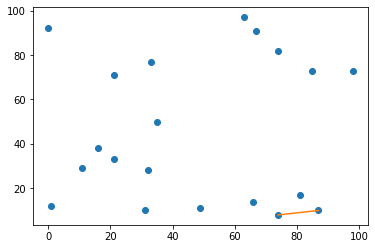

In [16]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
ax.plot(*plot(points1), 'o')
line, = ax.plot(*plot(anim[0]))

In [17]:
# initialization function: plot the background of each frame
def init():
    
    X, Y = plot(points1)
    line.set_data(X, Y)
    return line,

In [18]:
# animation function. This is called sequentially
import time
def animate(i):
    X, Y = plot(anim[i % len(anim)])
    line.set_xdata(X)
    line.set_ydata(Y)
    time.sleep(1)
    return (line,)

In [33]:
# call the animator. blit=True means only re-draw the parts that 
# have changed.
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=500, blit=True)

In [34]:
ani